In [2]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df = pd.concat([df,pd.Series(boston.target,name='MEDV')],axis=1)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124598d60>,
      dtype=object)

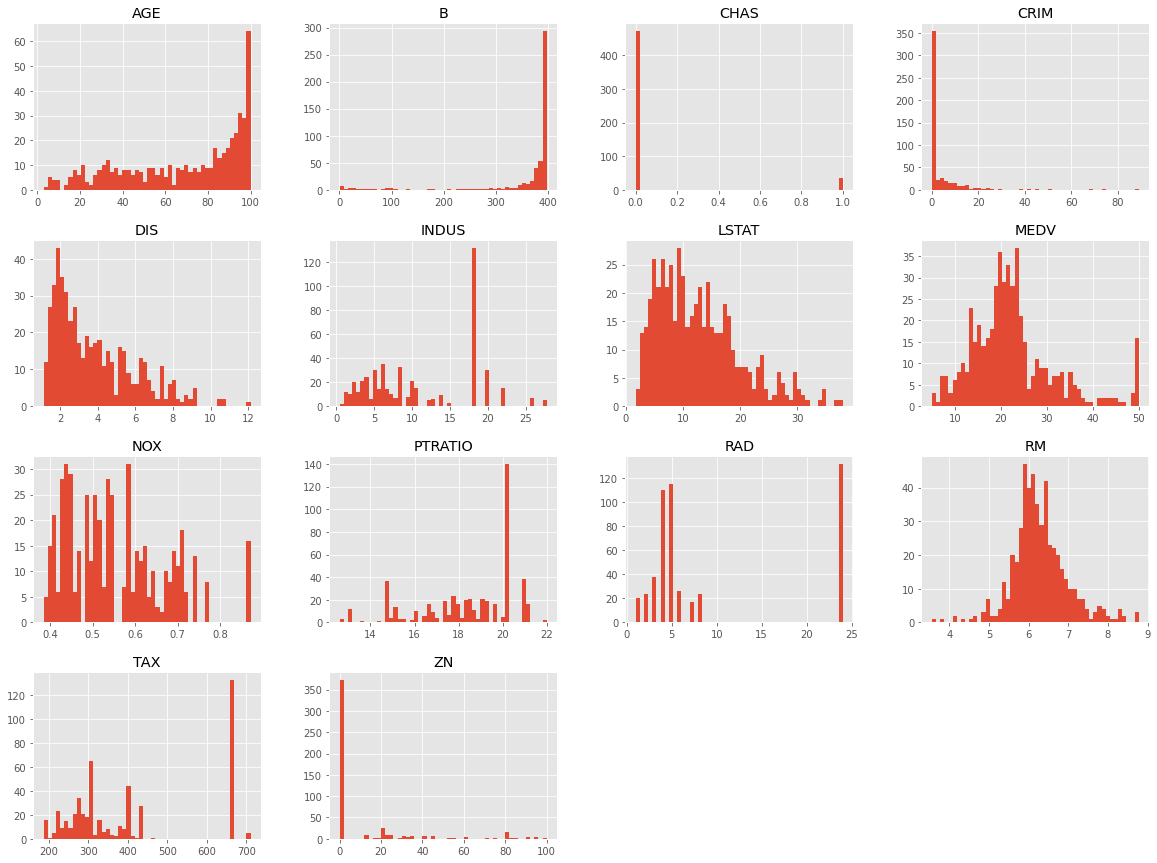

In [6]:
plt.style.use('ggplot')

df.hist(bins=50, figsize=(20,15))

In [7]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


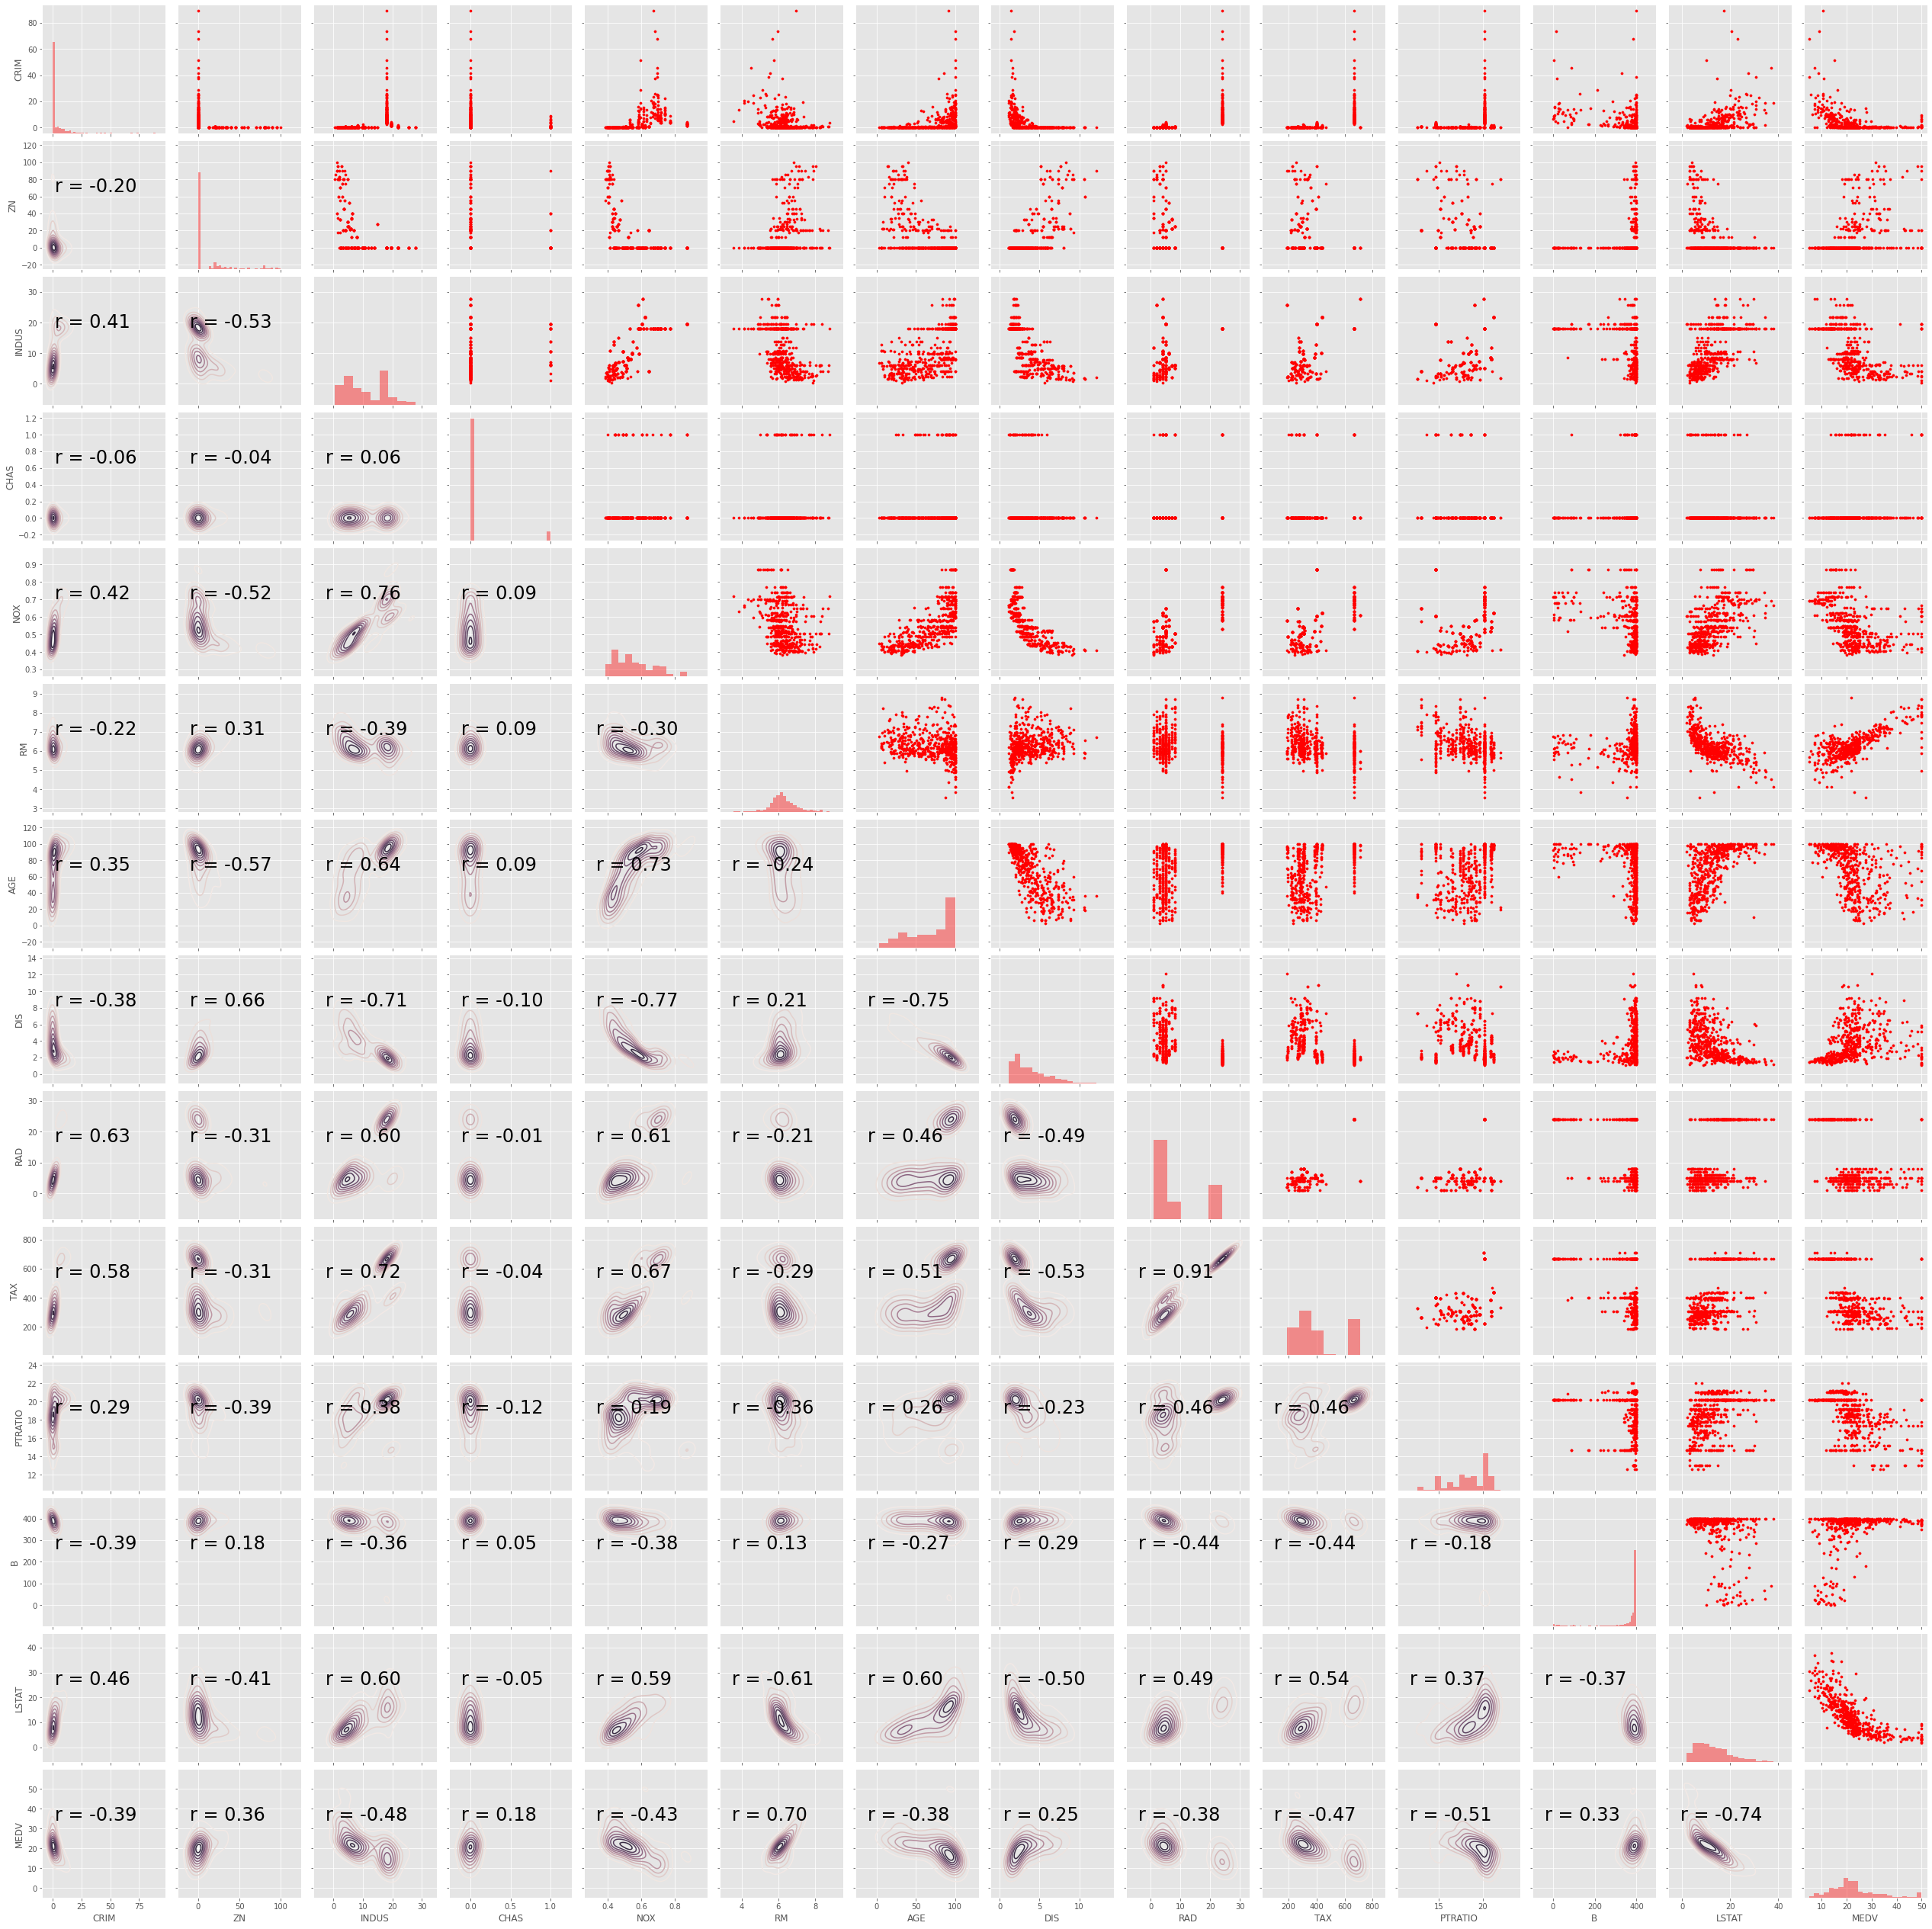

In [9]:
warnings.filterwarnings('ignore')

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [10]:
# It contains all attributes (all features and the target)
allData = df

# Use the following code to select a subset of the features, e.g., "LSTAT"
#X = df[['LSTAT', 'RM']]


# Use the following code to select ALL features
X = df.drop(columns='MEDV')  # Data Matrix containing all features excluding the target


y = df['MEDV'] # 1D targer vector

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [11]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create the OLS linear regression object
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


# The intercept
print("Intercept: \n", lin_reg.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)


print("\n----------------------------- Model Evaluation -----------------------------")


# Make prediction 
y_train_predicted = lin_reg.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))


# To compute 

# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted))

# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % lin_reg.score(X_train, y_train))

Intercept: 
 22.485268239316902
Coefficients: 
 [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [14]:
# Make prediction 
y_test_predicted = lin_reg.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))


Mean squared error: 24.29
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [15]:
# Ridge Regression

# Regularization parameter
ridge_alpha = 1.0

# Create Ridge linear regression object
lin_reg_ridge = Ridge(alpha=ridge_alpha, solver="cholesky")

# Train the model
lin_reg_ridge.fit(X_train, y_train)



# The intercept
print("Intercept: \n", lin_reg_ridge.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg_ridge.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_ridge.n_iter_)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_ridge = lin_reg_ridge.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_ridge))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_ridge))

Intercept: 
 22.484854796146763
Coefficients: 
 [-0.96203397  0.68255872  0.25071604  0.71033762 -1.96157279  3.12232106
 -0.17845861 -3.0100255   2.20195592 -1.71784558 -1.97082455  1.12414013
 -3.61478723]
Number of Iterations: 
 None

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [16]:
# Make prediction 
y_test_predicted = lin_reg_ridge.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f" % ridge_test_mse)


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.31
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [17]:
# Lasso Regression

# Regularization parameter
lasso_alpha = 0.001

# Create Lasso linear regression object
lin_reg_lasso = Lasso(alpha=lasso_alpha)


# Train the model
lin_reg_lasso.fit(X_train, y_train)



# The intercept
print("Intercept: \n", lin_reg_lasso.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg_lasso.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_lasso.n_iter_)


print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_lasso = lin_reg_lasso.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_lasso))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_lasso))

Intercept: 
 22.485113503791307
Coefficients: 
 [-0.96884467  0.6964981   0.26764373  0.7066938  -1.98536449  3.11636016
 -0.17476749 -3.03889473  2.26432318 -1.77408168 -1.97821676  1.12530339
 -3.6278453 ]
Number of Iterations: 
 61

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [18]:
# Make prediction 
y_test_predicted = lin_reg_lasso.predict(X_test)

lasso_test_mse = mean_squared_error(y_test, y_test_predicted)
print("Mean squared error: %.2f" % lasso_test_mse)

# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.29
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [19]:
print("%17s (alpha = %3.3f)  %10s (alpha = %3.3f)" % ("Ridge",ridge_alpha, "Lasso", lasso_alpha))
print("%17s MSE = %3.3f  %12s MSE = %3.3f" % (" ",ridge_test_mse, " ", lasso_test_mse))
print("________________________________________________________________\n")
for i in range(lin_reg_ridge.coef_.shape[0]):
    print("%8s: %15f  %30f" %(boston.feature_names[i], lin_reg_ridge.coef_[i], lin_reg_lasso.coef_[i]))

            Ridge (alpha = 1.000)       Lasso (alpha = 0.001)
                  MSE = 24.315               MSE = 24.295
________________________________________________________________

    CRIM:       -0.962034                       -0.968845
      ZN:        0.682559                        0.696498
   INDUS:        0.250716                        0.267644
    CHAS:        0.710338                        0.706694
     NOX:       -1.961573                       -1.985364
      RM:        3.122321                        3.116360
     AGE:       -0.178459                       -0.174767
     DIS:       -3.010025                       -3.038895
     RAD:        2.201956                        2.264323
     TAX:       -1.717846                       -1.774082
 PTRATIO:       -1.970825                       -1.978217
       B:        1.124140                        1.125303
   LSTAT:       -3.614787                       -3.627845


In [20]:
# Elastic Net Regression


# Create linear regression object
lin_reg_enet = ElasticNet(alpha=0.0001, l1_ratio=0.5)

# Train the model
lin_reg_enet.fit(X_train, y_train)



# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_enet))

Intercept: 
 22.485251811705538
Coefficients: 
 [-0.97116496  0.7009068   0.27575217  0.70661929 -1.9905123   3.11589008
 -0.17697507 -3.04469299  2.28016822 -1.79010527 -1.97967881  1.12639111
 -3.62786151]
Number of Iterations: 
 81

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [21]:
# Make prediction 
y_test_predicted = lin_reg_enet.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.29
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [22]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [1.0, 0.1, 0.01, 0.001], 'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000]}

enet = ElasticNet()

enet_cv = GridSearchCV(enet, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
enet_cv.fit(X_train, y_train)


params_optimal_enet = enet_cv.best_params_

print("Best Score (negative mean squared error): %f" % enet_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_enet)
print("\n")

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    3.2s


Best Score (negative mean squared error): -24.073327
Optimal Hyperparameter Values:  {'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 1000}


CPU times: user 643 ms, sys: 132 ms, total: 775 ms
Wall time: 5.18 s


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    5.1s finished


In [23]:
# Elastic Net Regression

# Create Elestic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)


# Train the model
lin_reg_enet.fit(X_train, y_train)


# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)



print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)


print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_enet))

Intercept: 
 22.4837683961124
Coefficients: 
 [-0.93618482  0.63150597  0.18201482  0.72034352 -1.8766665   3.13892025
 -0.18182713 -2.90751775  1.98869978 -1.52481576 -1.94485719  1.11708809
 -3.5760995 ]
Number of Iterations: 
 1000

----------------------------- Model Evaluation -----------------------------
Mean squared error: 21.66
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [24]:
# Scoring Parameter for Regression:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

scores = cross_val_score(lin_reg_enet, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(scores)

print("Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-14.32398658 -17.97884389 -28.36958451 -45.05198153 -21.31694739
 -26.94022427 -19.54718826 -20.69487106 -13.2786652  -33.2309811 ]
Negative Mean Squared Error: -24.07 (+/- 18.32)


In [25]:
# Make prediction using the test data
y_test_predicted = lin_reg_enet.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.38
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67
